<a href="https://colab.research.google.com/github/brngl/Classification-of-1994-Census-Income-Data/blob/master/Classification_of_1994_Census_Income_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh

# Loading dataset and update DataFrame with adequate column names

Dataset from: https://archive.ics.uci.edu/ml/datasets/census+income

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2020-02-05 00:17:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  13.2MB/s    in 0.3s    

2020-02-05 00:17:14 (13.2 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2020-02-05 00:17:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1.9M) [application/x-httpd-php]
Saving to: ‘adult.test’

adult.test          100%[===================>]   1.91M  7.48MB/s    in 0.3s    

2020

In [0]:
data_train = pd.read_csv('adult.data')
data_test = pd.read_csv('adult.test')
data_columns = 'age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')

In [4]:
data_columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [0]:
train = data_train.copy()
test = data_test.copy()

In [6]:
test.shape

(16281, 1)

In [7]:
train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [0]:
train.columns = data_columns
#test.columns = data_columns

In [0]:
t = train['income'] == ' >50K'

In [10]:
t.unique()

array([False,  True])

In [11]:
train['income'].any()

' <=50K'

In [0]:
train['income'] = t

In [13]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False


# After trasformation, '>50':True; '<=50':False

In [14]:
g = train==' ?'
g.sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [15]:
train['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
train['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
train['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

# Deleting '?' values standing for NA values

In [18]:
i = train.loc[train['native-country'] == ' ?'].index
train_drop = train.drop(index=i)
train_drop.shape

(31977, 15)

In [19]:
i = train.loc[train['occupation'] == ' ?'].index
train_drop = train.drop(index=i)
train_drop.shape

(30717, 15)

In [20]:
i = train.loc[train['workclass'] == ' ?'].index
train_drop = train.drop(index=i)
train_drop.shape

(30724, 15)

# Feature exploration for income value.


In [0]:
def show_bars(dat1, dat2, title, bins, ylabel='Number of people'):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot()
    dat1.hist(color='g', bins=bins)
    ax2 = fig.add_subplot()
    dat2.hist(color='r', bins=bins)
    plt.legend(('<=50K', '>50K'))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    
def show_boxes(dat1, dat2, title, ylabel='Number of people'):
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_title(title)
    plt.xticks([], ('<=50K', '>50K'))
    plt.ylabel(ylabel)
    ax.boxplot([dat1, dat2])
    plt.show()

In [0]:
gt = train_drop[train_drop['income'] == True]
ageG = gt['age']
lt = train_drop[train_drop['income'] == False]
ageL = lt['age']

In [23]:
ageG

6        52
7        31
8        42
9        37
10       30
         ..
32537    38
32544    39
32553    53
32556    40
32559    52
Name: age, Length: 7650, dtype: int64

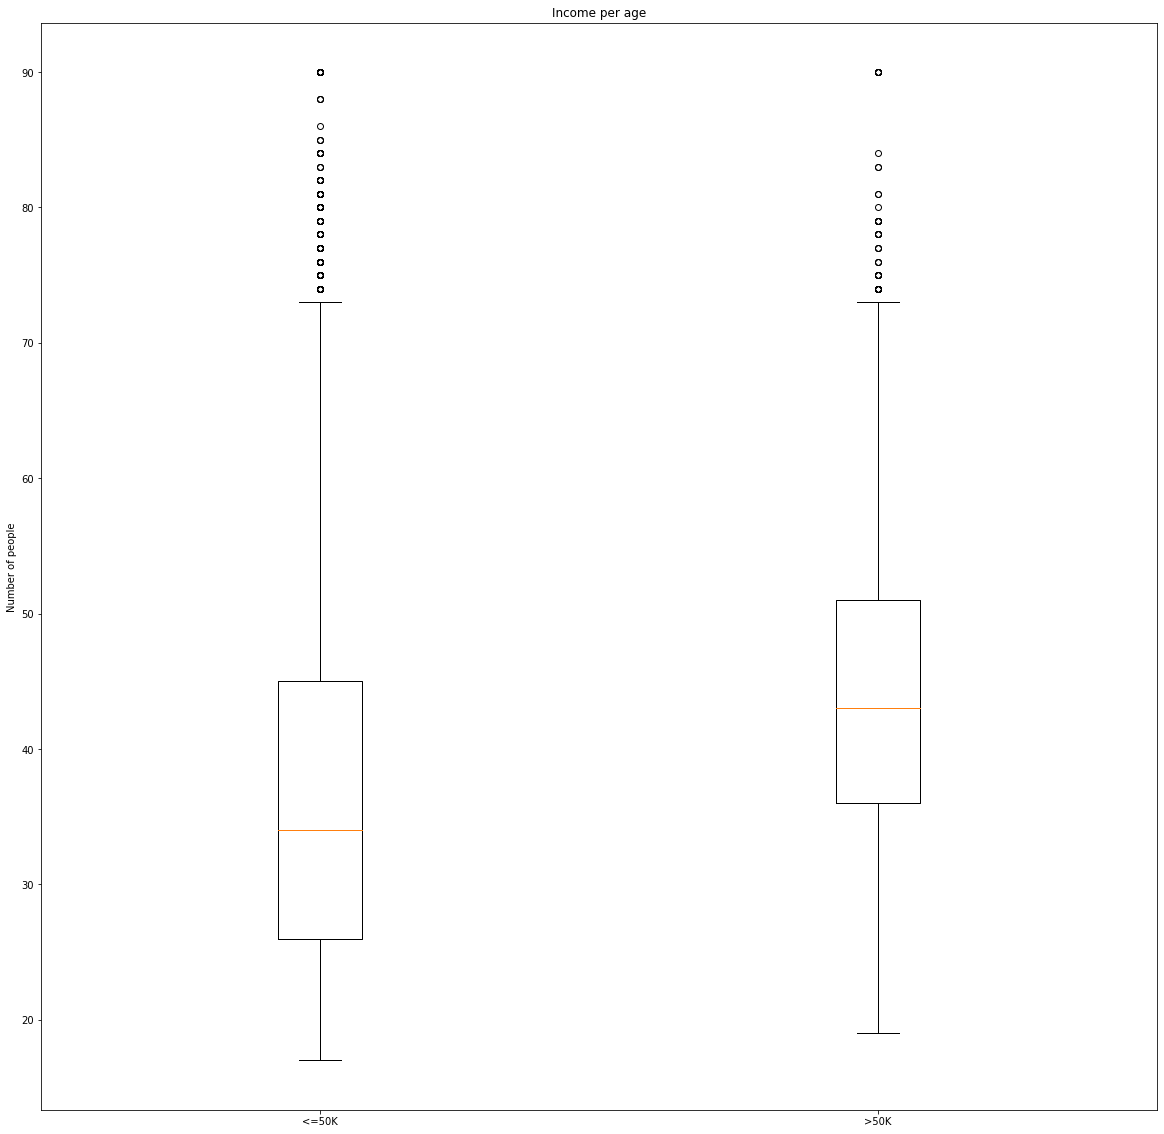

In [24]:
show_boxes(ageL, ageG, 'Income per age')

In [25]:
ageG.unique().shape

(65,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


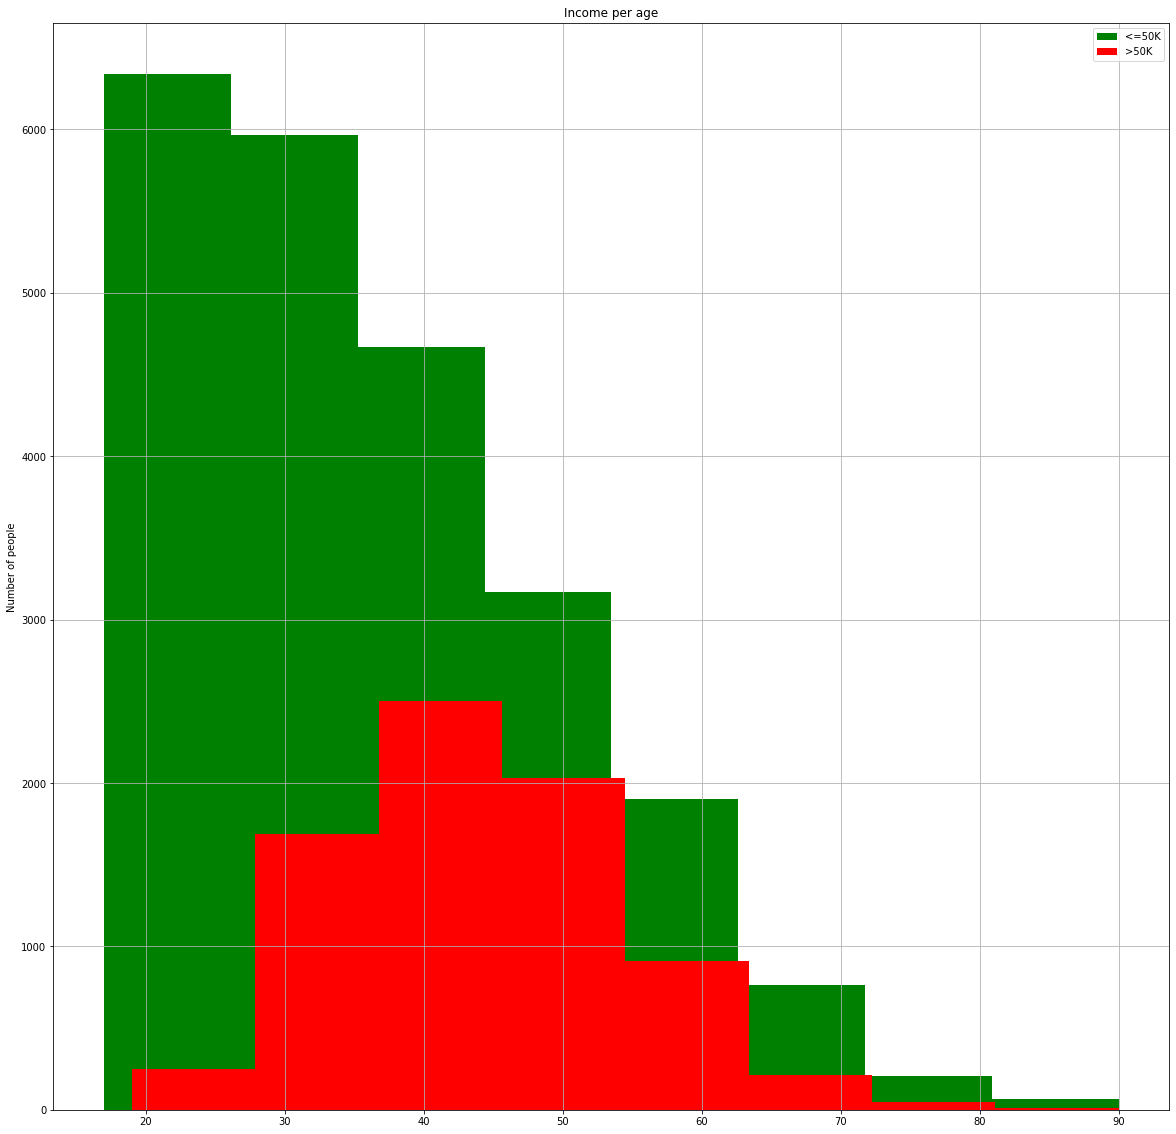

In [26]:
show_bars(ageL, ageG, 'Income per age', bins=8)

# Years of education


In [0]:
eduG = gt['education-num']
eduL = lt['education-num']

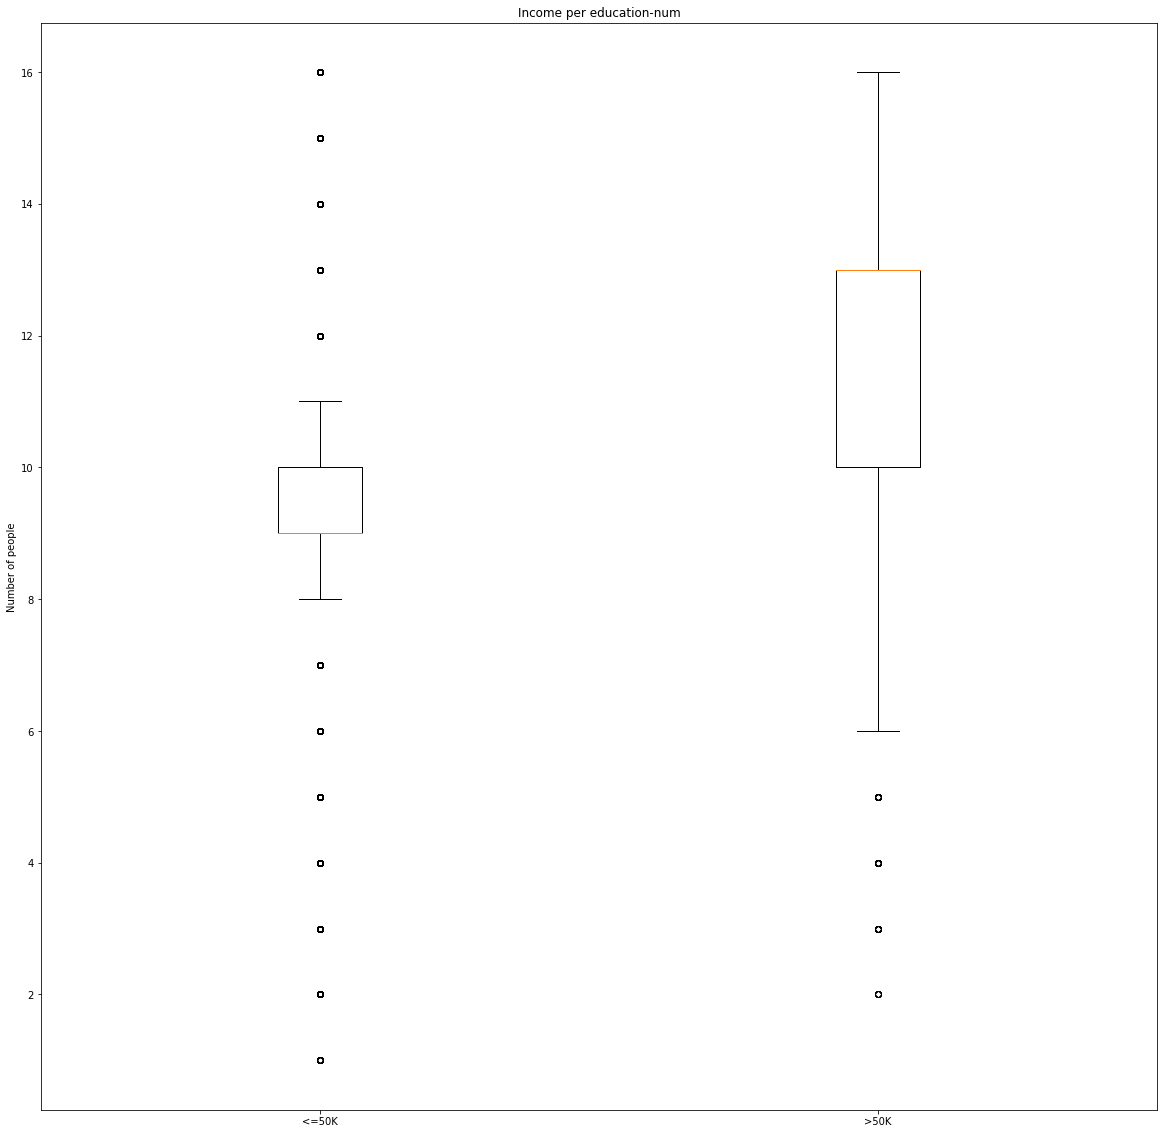

In [28]:
show_boxes(eduL, eduG, 'Income per education-num')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


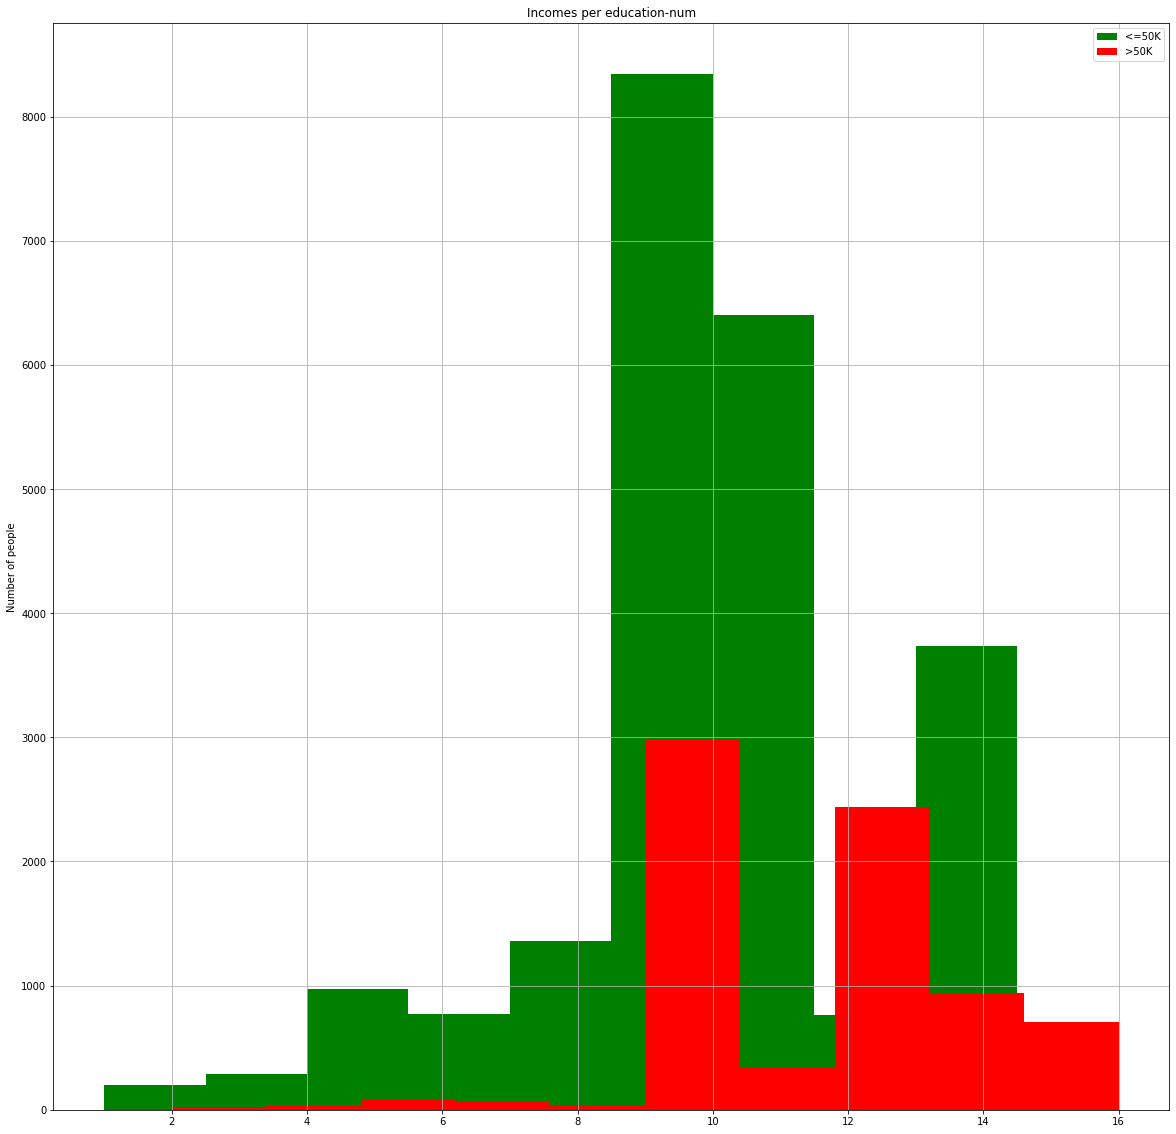

In [29]:
show_bars(eduL, eduG, 'Incomes per education-num', bins=10)

# Work class

In [30]:
train_drop['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [0]:
workG = gt['workclass']
workL = lt['workclass']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


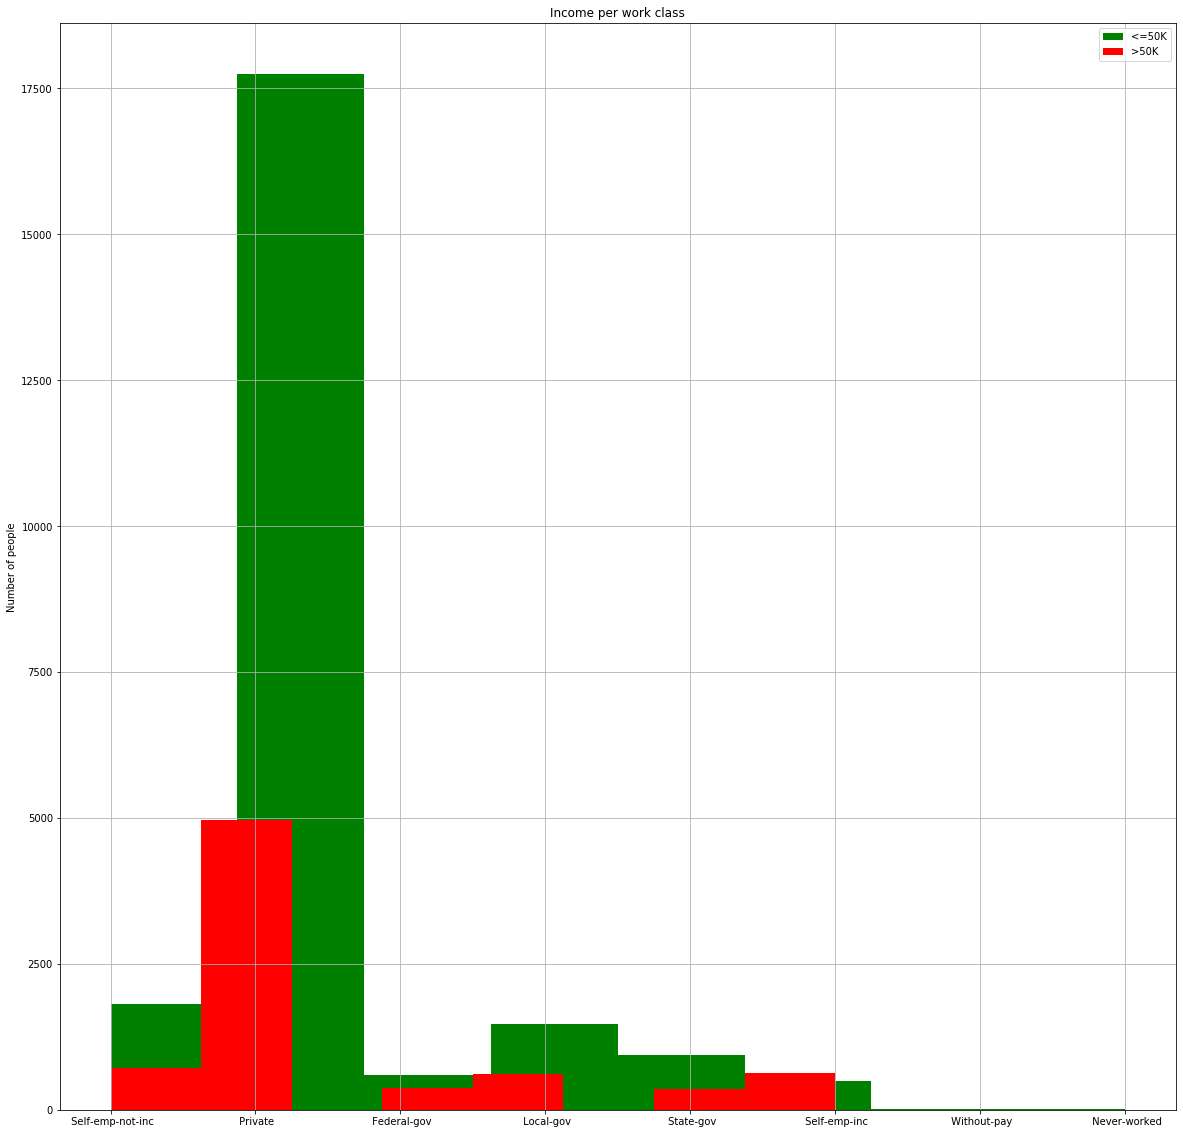

In [32]:
show_bars(workL, workG, 'Income per work class', bins=8)

In [0]:
wc = train_drop['workclass']==' Never-worked'

In [34]:
train_drop['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [0]:
occG = gt['occupation']
occL = lt['occupation']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


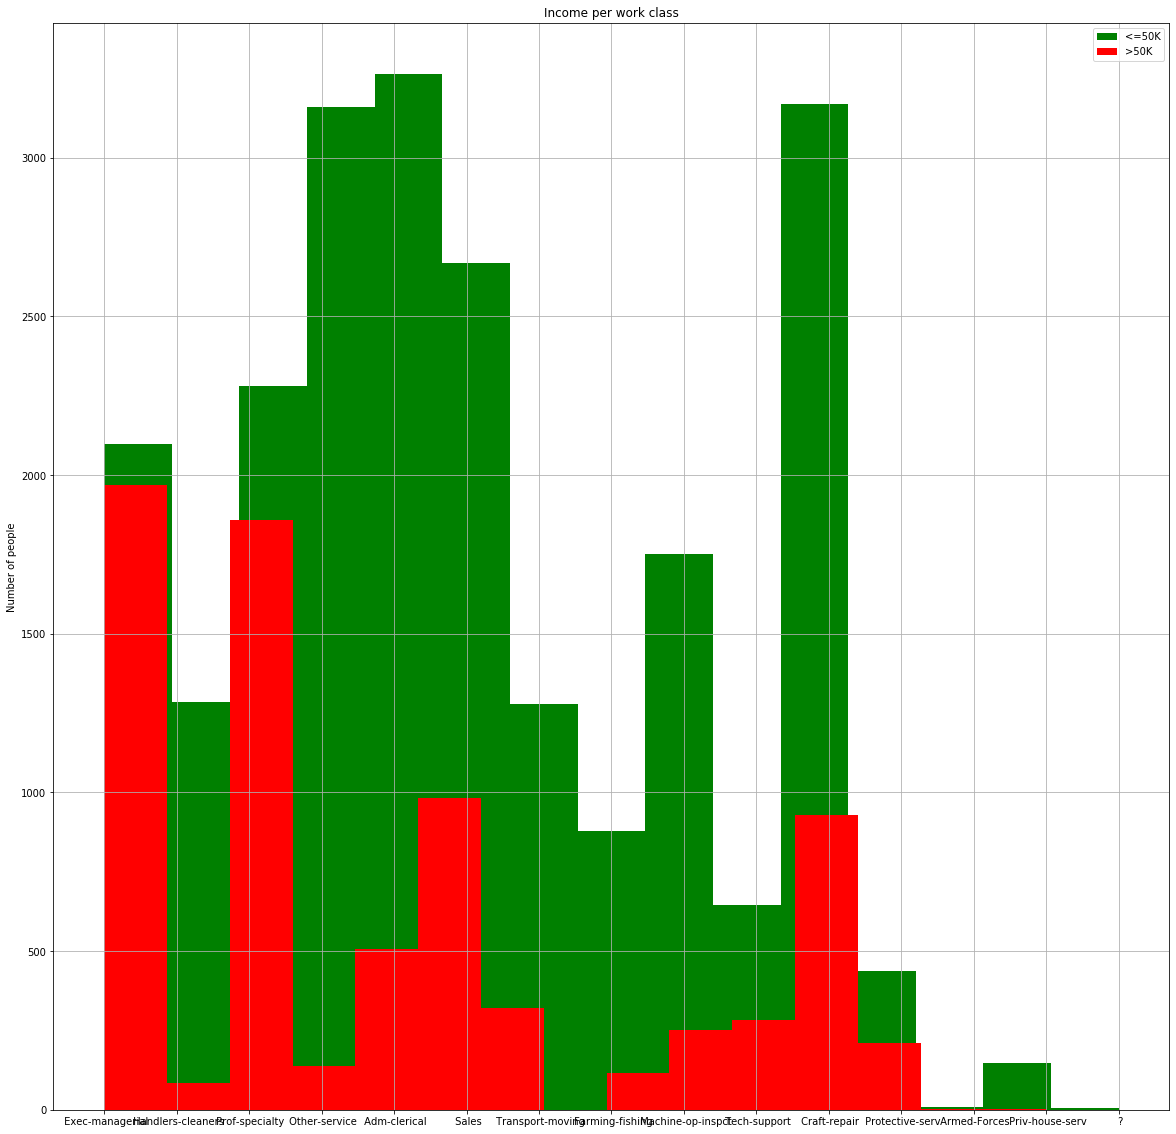

In [36]:
show_bars(occL, occG, 'Income per work class', bins=15)

# Marital status

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


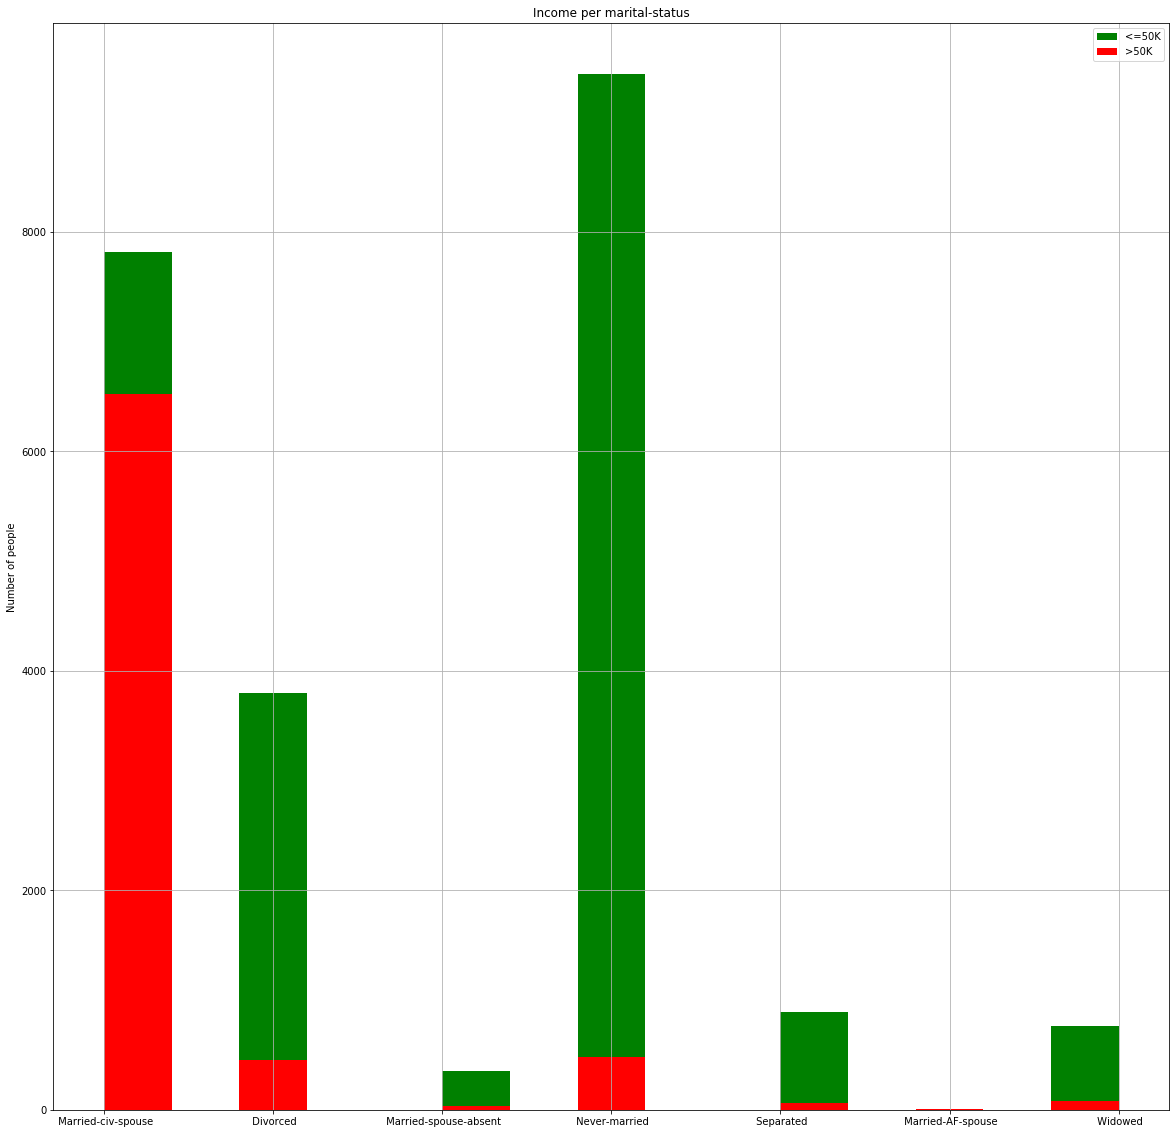

In [37]:
msG = gt['marital-status']
msL = lt['marital-status']
show_bars(msL, msG, 'Income per marital-status', bins=15)

# Relationship

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


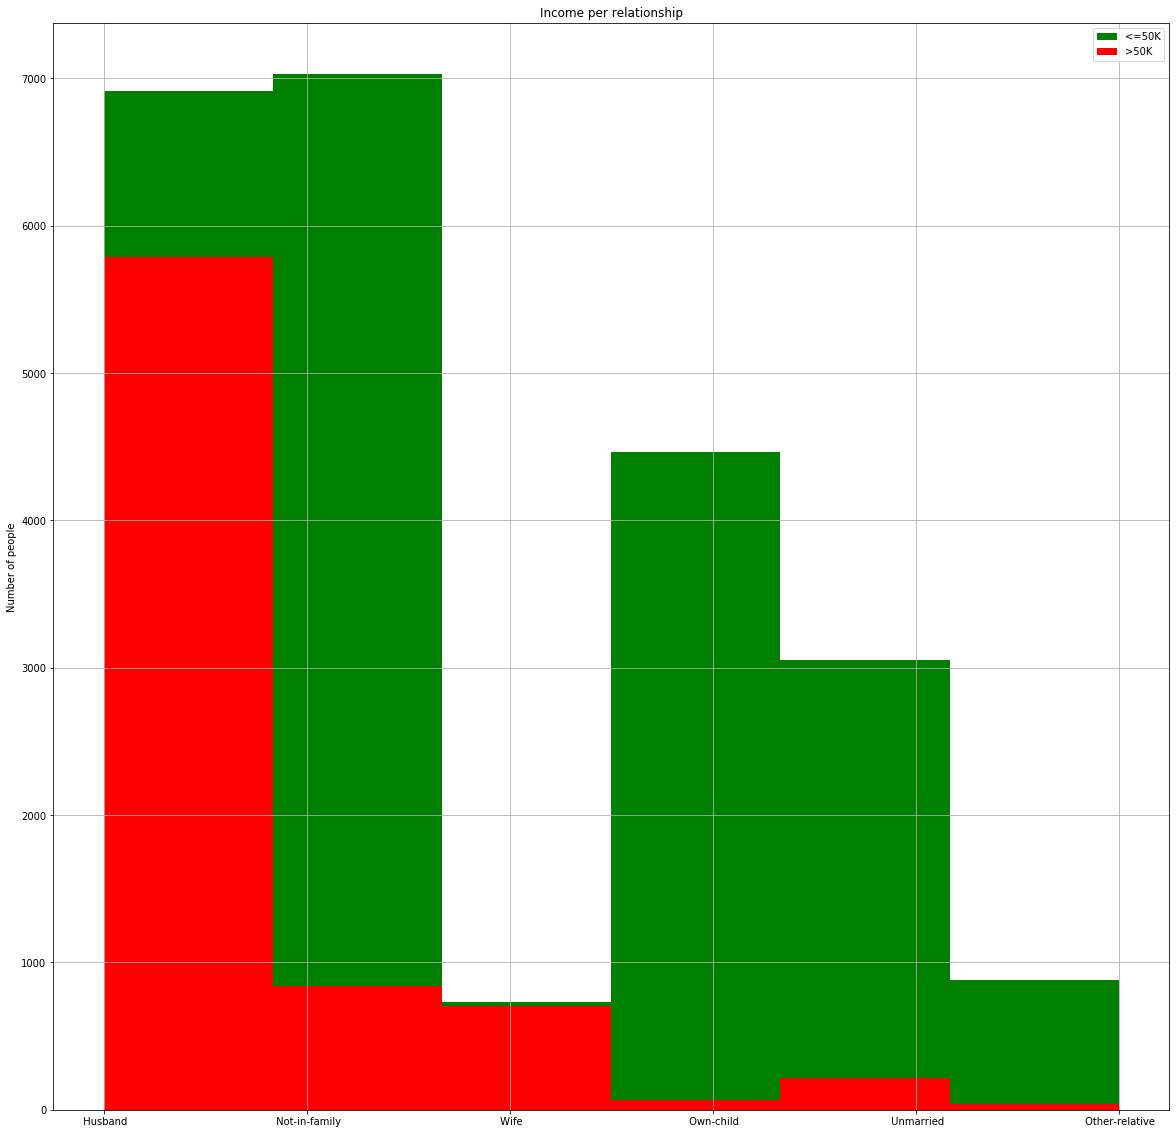

In [38]:
att = 'relationship'
rG = gt[att]
rL = lt[att]
show_bars(rL, rG, 'Income per relationship', bins=6)

# Race

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


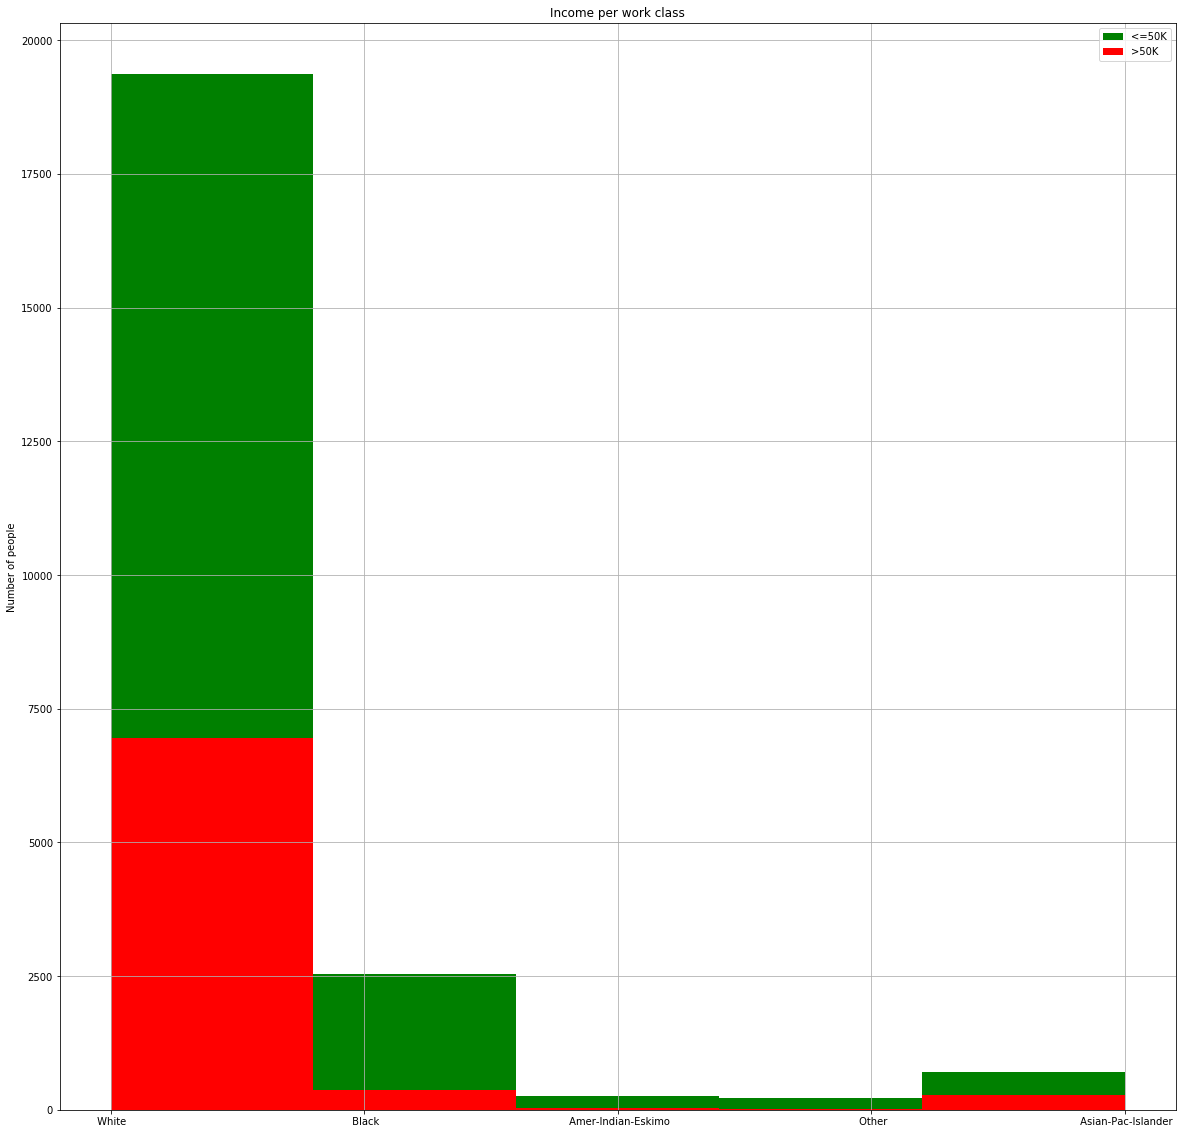

In [39]:
att = 'race'
raceG = gt[att]
raceL = lt[att]
show_bars(raceL, raceG, 'Income per work class', bins=5)

# Sex

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


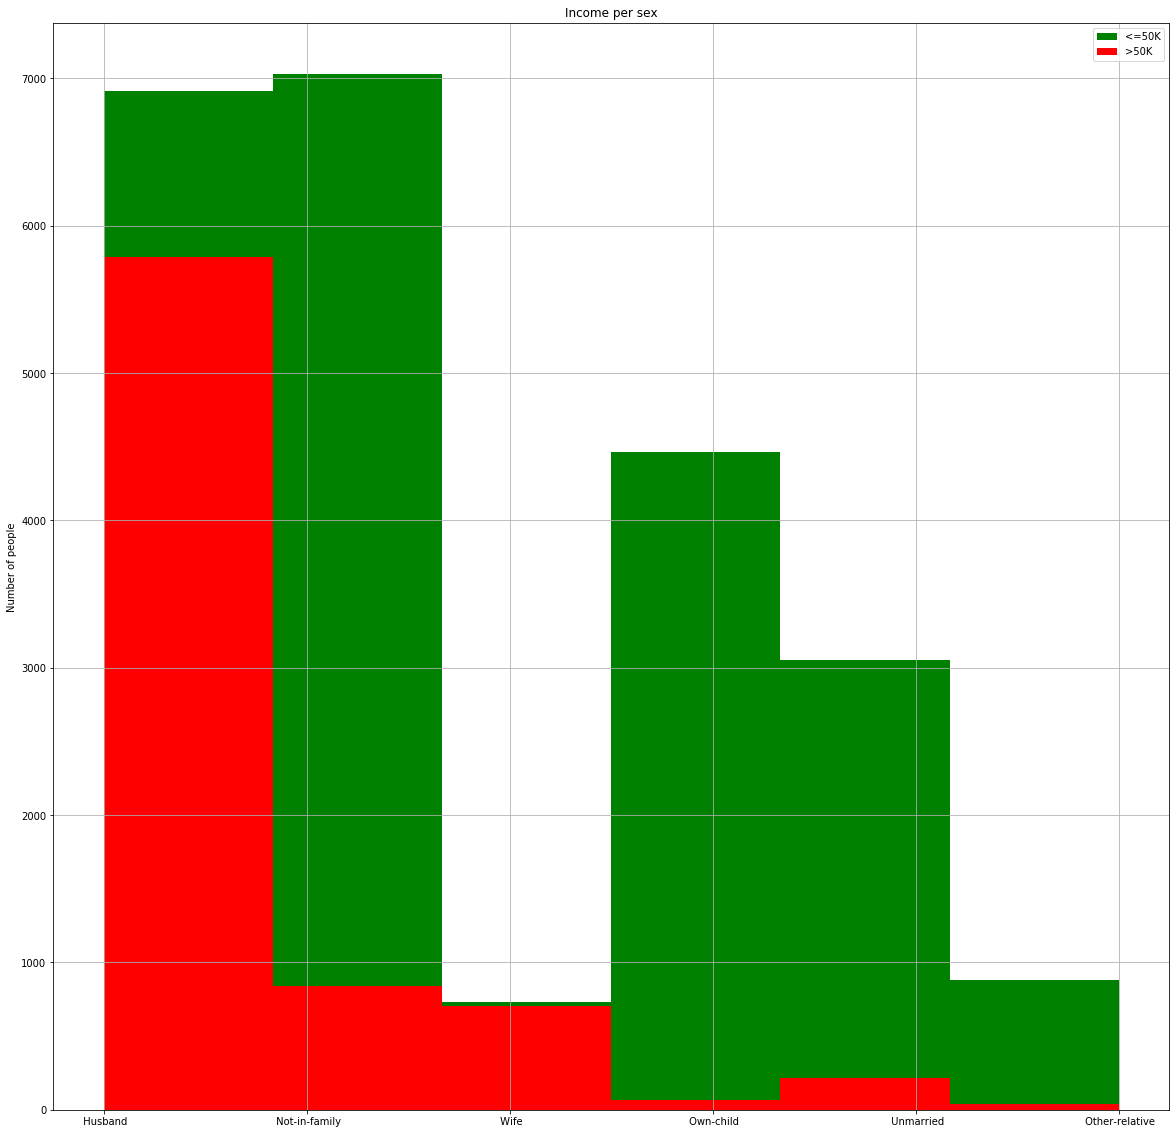

In [40]:
att = 'sex'
sexG = gt[att]
sexL = lt[att]
show_bars(rL, rG, 'Income per sex', bins=6)

# Capital gain

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


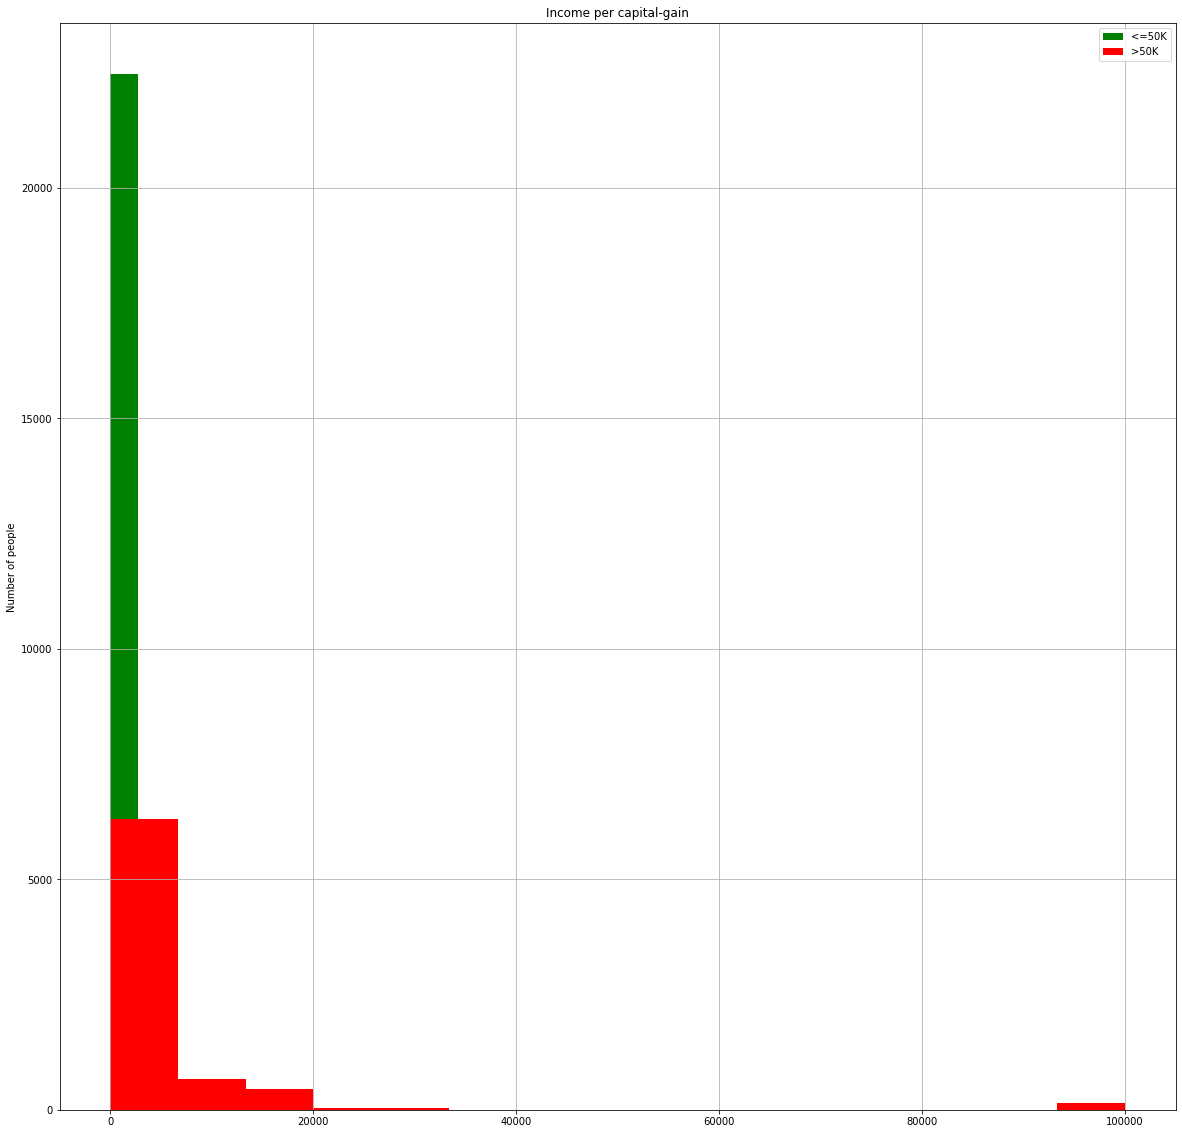

In [41]:
att = 'capital-gain'
cgG = gt[att]
cgL = lt[att]
show_bars(cgL, cgG, 'Income per capital-gain', bins=15)

# Capital loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


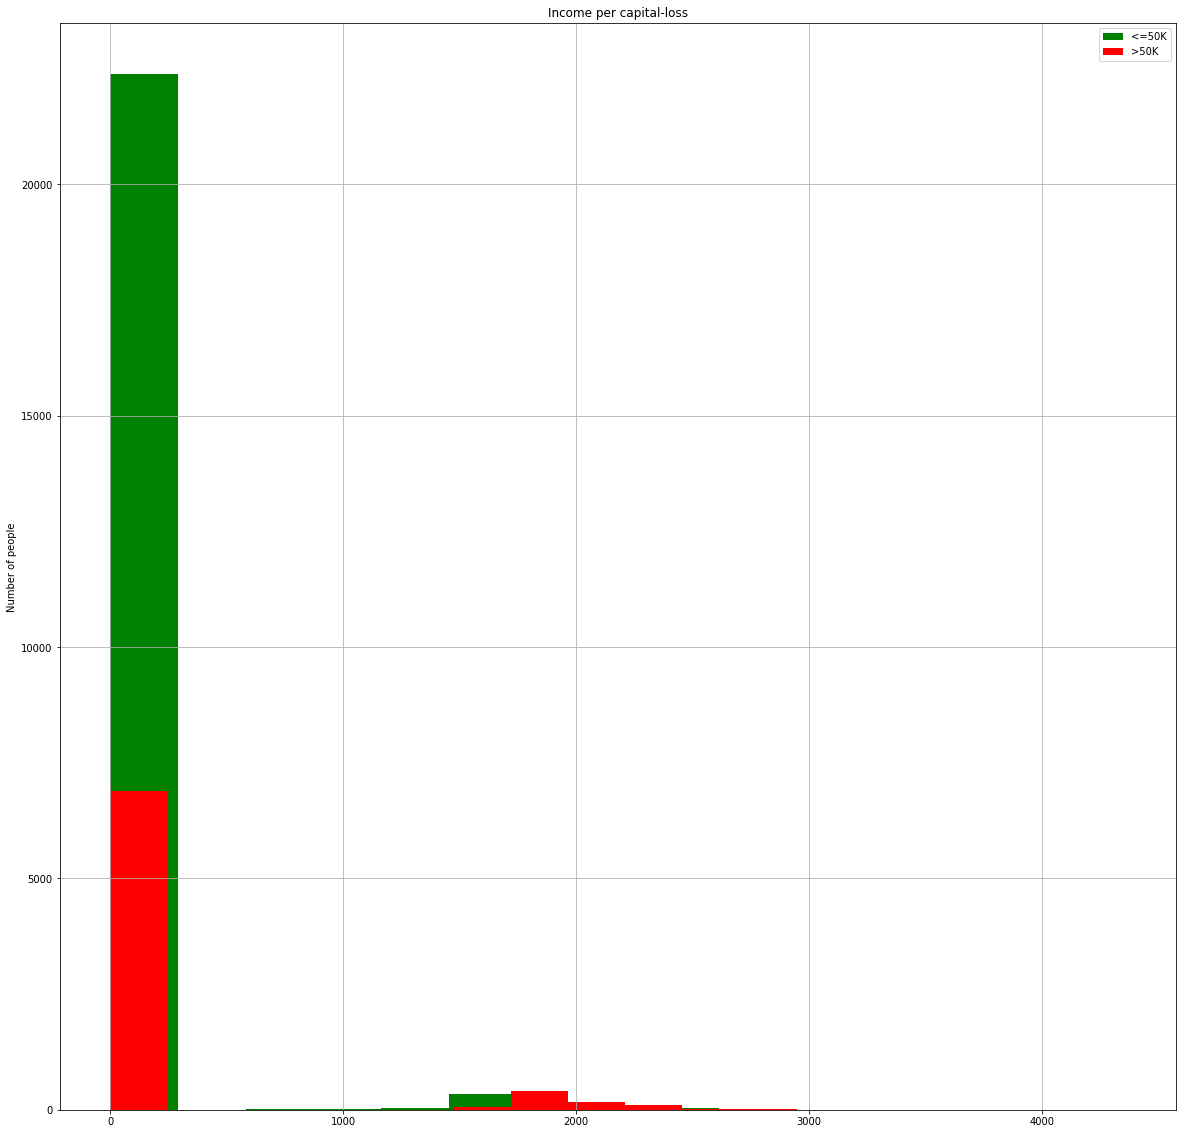

In [42]:
att = 'capital-loss'
clG = gt[att]
clL = lt[att]
show_bars(clL, clG, 'Income per capital-loss', bins=15)

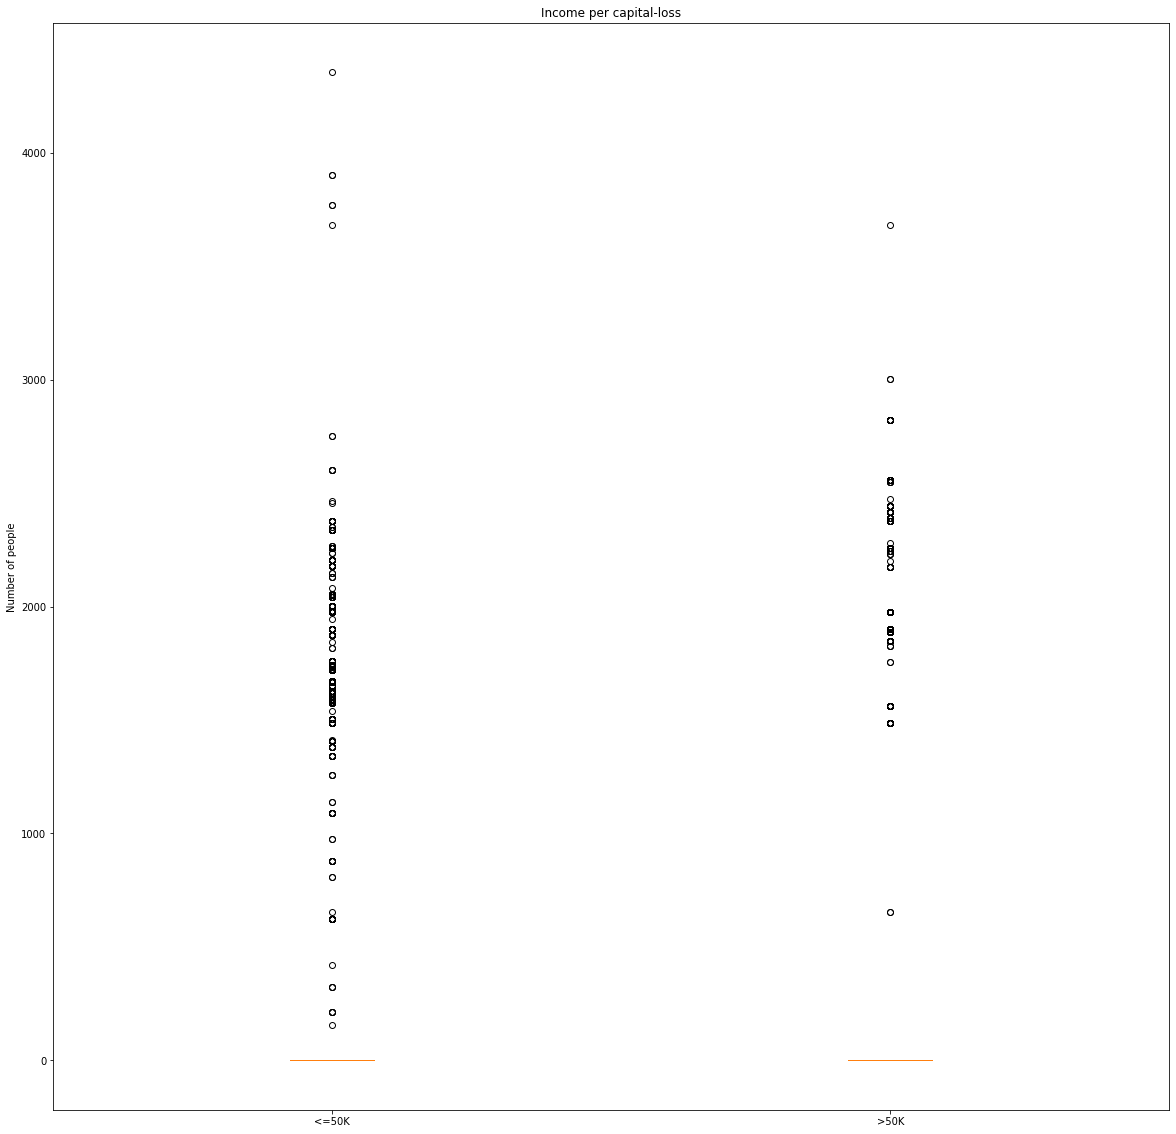

In [43]:
show_boxes(clL, clG, 'Income per capital-loss',)

In [44]:
print(train['capital-gain'].describe())
print()
print(train['capital-loss'].describe())

count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


In [45]:
print(cgL.describe())
print()
print(cgG.describe())
print()
print(clL.describe())
print()
print(clG.describe())

count    23074.00000
mean       147.92290
std        930.71146
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      41310.00000
Name: capital-gain, dtype: float64

count     7650.000000
mean      3994.758170
std      14561.393295
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

count    23074.000000
mean        53.514605
std        310.313126
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

count    7650.000000
mean      195.601046
std       595.993042
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3683.000000
Name: capital-loss, dtype: float64


# Hours per week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


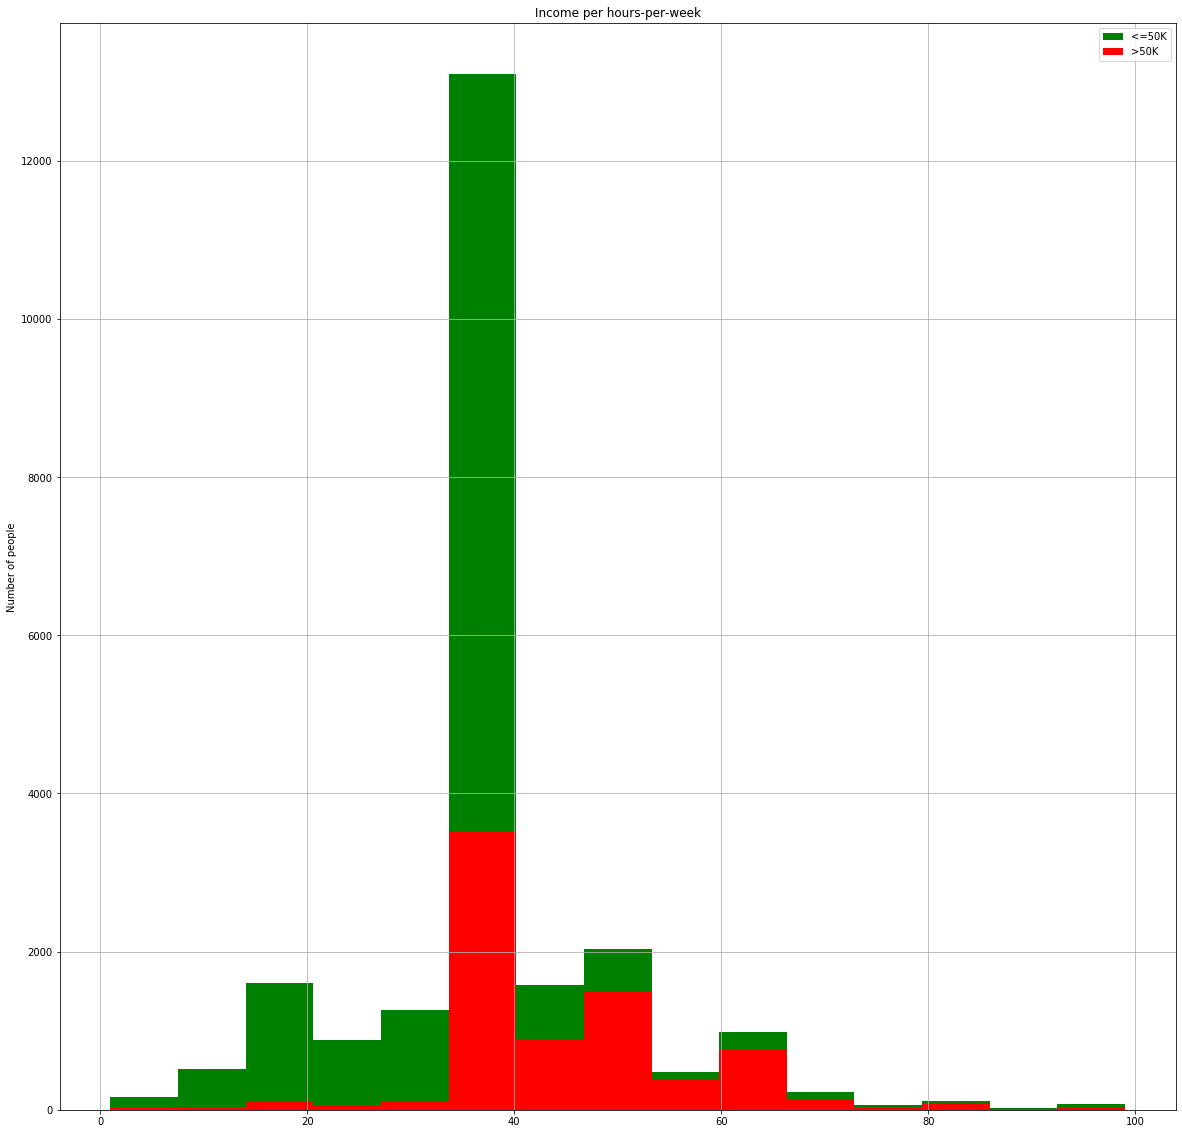

In [46]:
att = 'hours-per-week'
hwG = gt[att]
hwL = lt[att]
show_bars(hwL, hwG, 'Income per hours-per-week', bins=15)

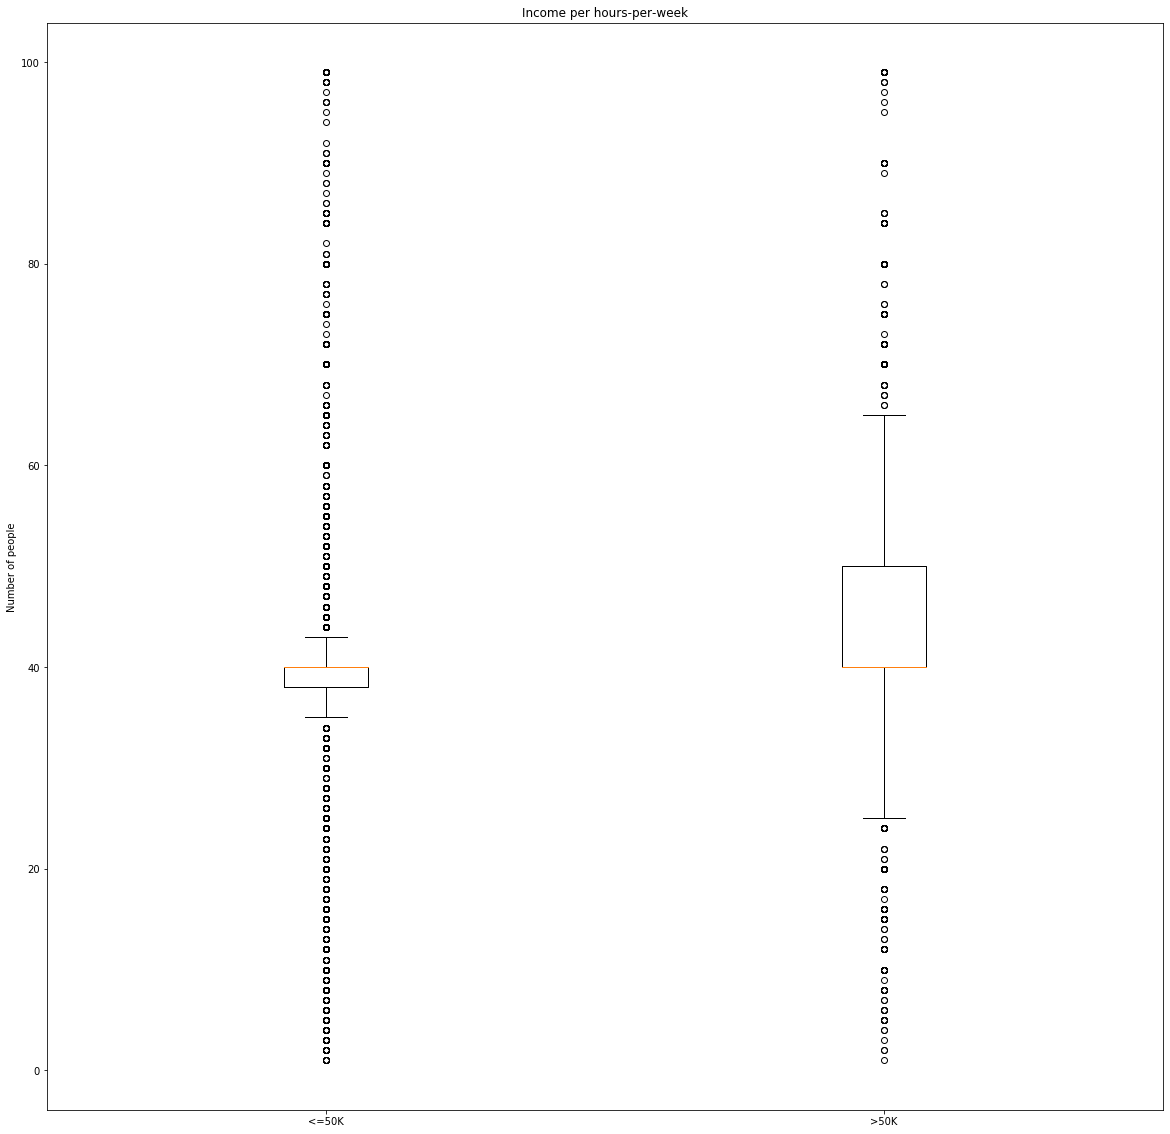

In [47]:
show_boxes(hwL, hwG, 'Income per hours-per-week',)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


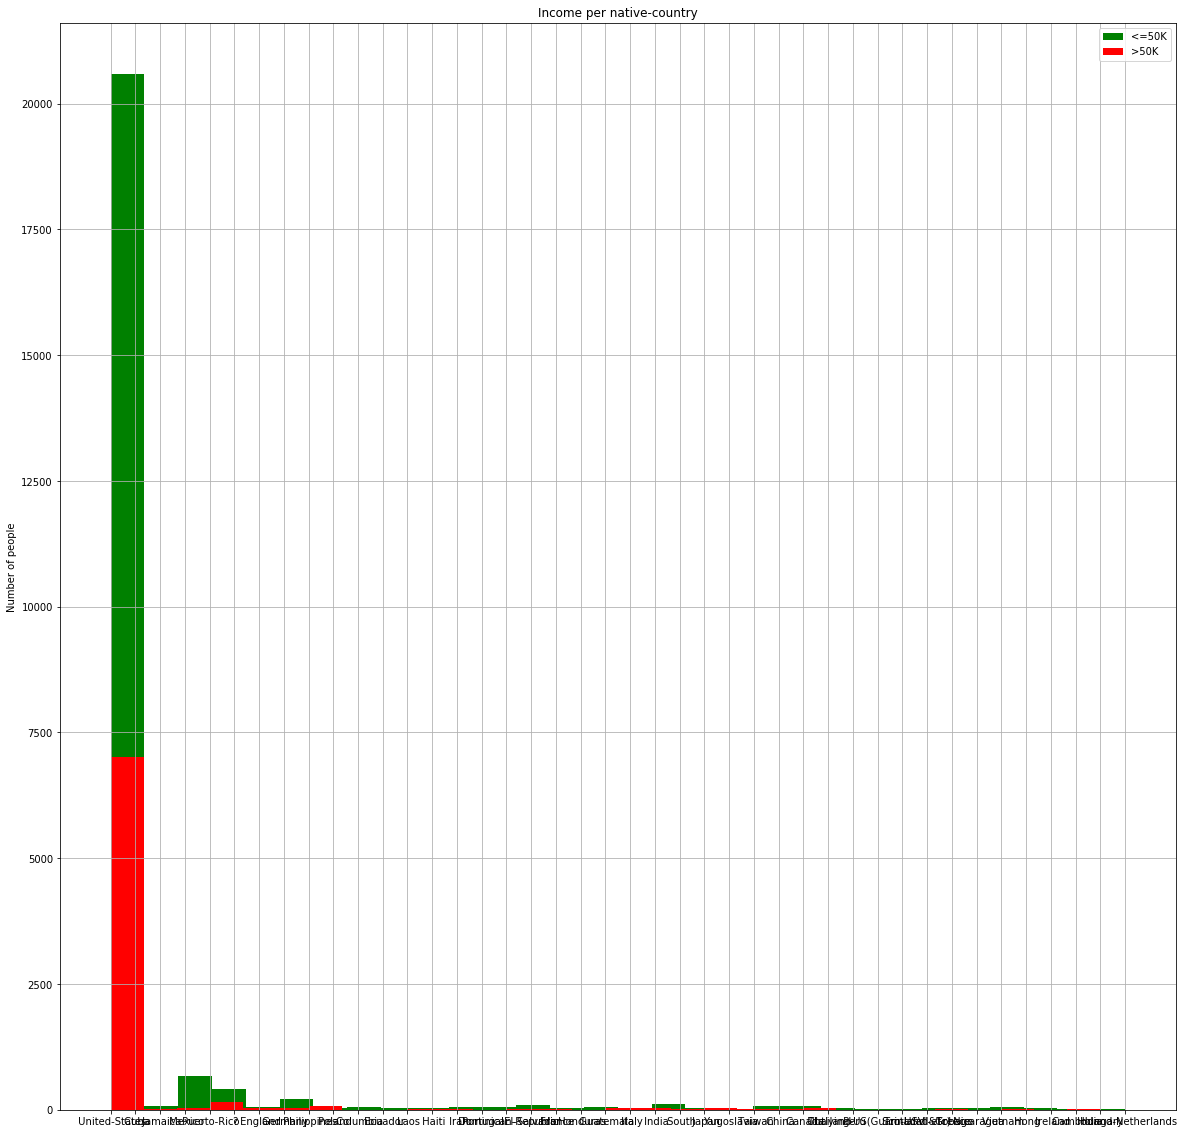

In [48]:
att = 'native-country'
ncG = gt[att]
ncL = lt[att]
show_bars(ncL, ncG, 'Income per native-country', bins=30)

# Trying various models

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [0]:
scores_means = dict()

In [0]:
X = train_drop.drop(['income'], axis=1)
y = train_drop['income']

# Encoding categorical attributes

In [0]:
cat_att = 'workclass education marital-status occupation relationship race sex native-country'.split(' ')
col_pipe = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_att)
])

In [0]:
X_prep = col_pipe.fit_transform(X)

# Trying Gradient Boosting Classifier with no scaling
I use cross validation on training set, ignoring test set

In [0]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [0]:
gbc = GradientBoostingClassifier()

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(gbc, X_prep, y, scoring='roc_auc', cv=10)

In [58]:
scores_means['Gradient Boosting Classifier no Scaling'] = scores.mean()
scores.mean()

0.8748671007172799

In [59]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Scaling features with StandardScaler

In [0]:
num_att = 'education-num capital-gain capital-loss hours-per-week'.split()
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipe = ColumnTransformer([
    ('pipe_scl', pipe, num_att),
    ('cat', OneHotEncoder(), cat_att)
])

X_prep_scaled = full_pipe.fit_transform(X)

scores = cross_val_score(gbc, X_prep_scaled, y, scoring='roc_auc', cv=10)

In [61]:
scores_means['Gradient Boosting Classifier tutte le feature'] = scores.mean()
scores.mean()

0.9134147139566707

# Trying to delete useless features.

In [0]:
train_drop_2 = train_drop.drop(['race','marital-status','native-country'], axis=1)
#train_drop_2 = train_drop.drop(['race','relationship','native-country'], axis=1)

In [0]:
X_drop = train_drop.drop(['income'], axis=1)
y = train_drop['income']

In [0]:
num_att = 'education-num capital-gain capital-loss hours-per-week'.split()
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipe = ColumnTransformer([
    ('pipe_scl', pipe, num_att),
    ('cat', OneHotEncoder(), cat_att)
])

X_prep_scaled = full_pipe.fit_transform(X_drop)

scores = cross_val_score(gbc, X_prep_scaled, y, scoring='roc_auc', cv=10)

In [65]:
scores_means['Gradient Boosting Classifier'] = scores.mean()
scores.mean()

0.9134114842541328

# RandomForest

In [0]:
rfc = RandomForestClassifier()

num_att = 'education-num capital-gain capital-loss hours-per-week'.split()
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipe = ColumnTransformer([
    ('pipe_scl', pipe, num_att),
    ('cat', OneHotEncoder(), cat_att)
])

X_prep_scaled = full_pipe.fit_transform(X_drop)

scores = cross_val_score(rfc, X_prep_scaled, y, scoring='roc_auc', cv=10)

In [67]:
scores_means['Random Forest Classifier'] = scores.mean()
scores.mean()

0.8889476659398479

# Support Vector Machine

In [0]:
from sklearn.svm import SVC

svc = SVC(kernel='poly', degree=4)

num_att = 'education-num capital-gain capital-loss hours-per-week'.split()
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipe = ColumnTransformer([
    ('pipe_scl', pipe, num_att),
    ('cat', OneHotEncoder(), cat_att)
])

X_prep_scaled = full_pipe.fit_transform(X_drop)

scores = cross_val_score(svc, X_prep_scaled, y, scoring='roc_auc', cv=10)

In [69]:
scores_means['SVM poly degree=4'] = scores.mean()
scores.mean()

0.8742096618745595

# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)

num_att = 'education-num capital-gain capital-loss hours-per-week'.split()
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipe = ColumnTransformer([
    ('pipe_scl', pipe, num_att),
    ('cat', OneHotEncoder(), cat_att)
])

X_prep_scaled = full_pipe.fit_transform(X_drop)

scores = cross_val_score(knn, X_prep_scaled, y, scoring='roc_auc', cv=10)

scores_means['KNN 25'] = scores.mean()
scores.mean()

0.8884666454646165

# Metric: AOC

In [71]:
scores_means

{'Gradient Boosting Classifier': 0.9134114842541328,
 'Gradient Boosting Classifier no Scaling': 0.8748671007172799,
 'Gradient Boosting Classifier tutte le feature': 0.9134147139566707,
 'KNN 25': 0.8884666454646165,
 'Random Forest Classifier': 0.8889476659398479,
 'SVM poly degree=4': 0.8742096618745595}

# Trying Neural Network

In [0]:
import tensorflow as tf
from tensorflow import keras
if tf.__version__!='2.0.0':
    !pip install 'tensorflow'==2.0.0

In [75]:
X_prep_scaled.shape

(30724, 105)

In [0]:
def build_model():
    model = keras.models.Sequential([
            keras.layers.Input(shape=[105,]),
            keras.layers.Dense(200, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(300, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(600, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(300, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(200, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(1, activation='sigmoid'),
    ])
    opt = keras.optimizers.Adam()
    loss = keras.losses.BinaryCrossentropy()
    model.compile(optimizer=opt, 
              loss=loss,  
              metrics=['accuracy', ],
              )
    print(model.summary())
    return model


# Performing cross validation wrapping keras model in a keras classifier



In [113]:
from keras.wrappers.scikit_learn import KerasClassifier

keras_clf = KerasClassifier(build_model, epochs=50)

scores = cross_val_score(keras_clf, X_prep_scaled, y, scoring='roc_auc', cv=3, verbose=True, )

scores_means['NeuralNetwork'] = scores.mean()
scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 200)               21200     
_________________________________________________________________
batch_normalization_75 (Batc (None, 200)               800       
_________________________________________________________________
dense_91 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_76 (Batc (None, 300)               1200      
_________________________________________________________________
dense_92 (Dense)             (None, 600)               180600    
_________________________________________________________________
batch_normalization_77 (Batc (None, 600)               2400      
_________________________________________________________________
dense_93 (Dense)             (None, 300)             

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.1min finished


0.8884666454646165

In [117]:
scores_means

{'Gradient Boosting Classifier': 0.9134114842541328,
 'Gradient Boosting Classifier no Scaling': 0.8748671007172799,
 'Gradient Boosting Classifier tutte le feature': 0.9134147139566707,
 'KNN 25': 0.8884666454646165,
 'NeuralNetwork': 0.869899011900903,
 'Random Forest Classifier': 0.8889476659398479,
 'SVM poly degree=4': 0.8742096618745595}

In [115]:
l = [1,2,3,5]
list(enumerate(l))

[(0, 1), (1, 2), (2, 3), (3, 5)]